# Roommate's flu

## Preparation (FastQC, Trimmomatic)

Downloading sequencing results from the NCBI Sequence Read Archive

In [ ]:
!wget "http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz"

--2022-11-11 00:24:54--  http://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/001/SRR1705851/SRR1705851.fastq.gz
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19217176 (18M) [application/x-gzip]
Saving to: ‘SRR1705851.fastq.gz’

SRR1705851.fastq.gz 100%[===================>]  18.33M  15.4MB/s    in 1.2s    

2022-11-11 00:24:58 (15.4 MB/s) - ‘SRR1705851.fastq.gz’ saved [19217176/19217176]



Unpacking data from .gz archive

In [ ]:
!gunzip "/content/SRR1705851.fastq.gz"

Downloading the reference sequence for the influenza hemagglutinin gene

In [ ]:
!wget "https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_2/main/sequence.fasta"

--2022-11-11 15:30:48--  https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_2/main/sequence.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1794 (1.8K) [text/plain]
Saving to: ‘sequence.fasta’

sequence.fasta      100%[===================>]   1.75K  --.-KB/s    in 0s      

2022-11-11 15:30:48 (34.6 MB/s) - ‘sequence.fasta’ saved [1794/1794]



Downloading fastqc

In [ ]:
!apt-get install fastqc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libapache-pom-java libcommons-compress-java libcommons-jexl2-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libhtsjdk-java libjbzip2-java libngs-java libngs-sdk-dev libngs-sdk1
  libsnappy-java libsnappy-jni libxz-java
Suggested packages:
  libcommons-jexl2-java-doc libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-java liblog4j1.2-java
  picard-tools
The following NEW packages will be installed:
  fastqc libapache-pom-java libcommons-compress-java libcommons-jexl2-java
  libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libhtsjdk-java libjbzip2-java libngs-java libngs-sdk-dev libngs-sdk1
  libsnappy-java libsnappy-jni libxz-java

Checking the quality of received data 

In [ ]:
!fastqc -o . /content/SRR1705851.fastq

Started analysis of SRR1705851.fastq
Approx 5% complete for SRR1705851.fastq
Approx 10% complete for SRR1705851.fastq
Approx 15% complete for SRR1705851.fastq
Approx 20% complete for SRR1705851.fastq
Approx 25% complete for SRR1705851.fastq
Approx 30% complete for SRR1705851.fastq
Approx 35% complete for SRR1705851.fastq
Approx 40% complete for SRR1705851.fastq
Approx 45% complete for SRR1705851.fastq
Approx 50% complete for SRR1705851.fastq
Approx 55% complete for SRR1705851.fastq
Approx 60% complete for SRR1705851.fastq
Approx 65% complete for SRR1705851.fastq
Approx 70% complete for SRR1705851.fastq
Approx 75% complete for SRR1705851.fastq
Approx 80% complete for SRR1705851.fastq
Approx 85% complete for SRR1705851.fastq
Approx 90% complete for SRR1705851.fastq
Approx 95% complete for SRR1705851.fastq
Analysis complete for SRR1705851.fastq


The report from fastqc you can find in the rep. After checking the quality we decided to use Trimmomatic to improve it

Downloading Trimmomatic

In [ ]:
!wget "http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip"

--2022-11-11 15:31:22--  http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/Trimmomatic-0.39.zip
Resolving www.usadellab.org (www.usadellab.org)... 199.195.140.36
Connecting to www.usadellab.org (www.usadellab.org)|199.195.140.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133596 (130K) [application/zip]
Saving to: ‘Trimmomatic-0.39.zip’

Trimmomatic-0.39.zi 100%[===================>] 130.46K   320KB/s    in 0.4s    

2022-11-11 15:31:23 (320 KB/s) - ‘Trimmomatic-0.39.zip’ saved [133596/133596]



In [ ]:
!unzip /content/Trimmomatic-0.39.zip

Archive:  /content/Trimmomatic-0.39.zip
   creating: Trimmomatic-0.39/
  inflating: Trimmomatic-0.39/LICENSE  
  inflating: Trimmomatic-0.39/trimmomatic-0.39.jar  
   creating: Trimmomatic-0.39/adapters/
  inflating: Trimmomatic-0.39/adapters/NexteraPE-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq2-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq2-SE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-PE-2.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-PE.fa  
  inflating: Trimmomatic-0.39/adapters/TruSeq3-SE.fa  


Using Trimmomatic

In [ ]:
!java -jar /content/Trimmomatic-0.39/trimmomatic-0.39.jar SE -phred33 /content/SRR1705851.fastq output.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticSE: Started with arguments:
 -phred33 /content/SRR1705851.fastq output.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Automatically using 2 threads
Input Reads: 358265 Surviving: 357171 (99.69%) Dropped: 1094 (0.31%)
TrimmomaticSE: Completed successfully


Checking the quality of the received file

In [ ]:
!fastqc -o . /content/output.fastq

Started analysis of output.fastq
Approx 5% complete for output.fastq
Approx 10% complete for output.fastq
Approx 15% complete for output.fastq
Approx 20% complete for output.fastq
Approx 25% complete for output.fastq
Approx 30% complete for output.fastq
Approx 35% complete for output.fastq
Approx 40% complete for output.fastq
Approx 45% complete for output.fastq
Approx 50% complete for output.fastq
Approx 55% complete for output.fastq
Approx 60% complete for output.fastq
Approx 65% complete for output.fastq
Approx 70% complete for output.fastq
Approx 75% complete for output.fastq
Approx 80% complete for output.fastq
Approx 85% complete for output.fastq
Approx 90% complete for output.fastq
Approx 95% complete for output.fastq
Analysis complete for output.fastq


The report you can also find in the rep. Almost nothing was improved, so we are going to use the original sequence futher. We are going to use BWA-MEM for alignment

## Alignment

Downloading bwa

In [ ]:
!apt-get install bwa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  samtools
The following NEW packages will be installed:
  bwa
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 176 kB of archives.
After this operation, 404 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 bwa amd64 0.7.17-1ubuntu0.1 [176 kB]
Fetched 176 kB in 1s (185 kB/s)
Selecting previously unselected package bwa.
(Reading database ... 124284 files and directories currently installed.)
Preparing to unpack .../bwa_0.7.17-1ubuntu0.1_amd64.deb ...
Unpacking bwa (0.7.17-1ubuntu0.1) ...
Setting up bwa (0.7.17-1ubuntu0.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


Downloading samtools

In [ ]:
!apt-get install samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cwltool libc-ares2 libhts2 libjs-bootstrap nodejs nodejs-doc
  python-asn1crypto python-avro python-cachecontrol python-certifi
  python-cffi-backend python-chardet python-cryptography python-enum34
  python-html5lib python-idna python-ipaddress python-isodate python-lockfile
  python-mistune python-openssl python-pkg-resources python-pyparsing
  python-rdflib python-rdflib-jsonld python-requests python-ruamel.yaml
  python-schema-salad python-shellescape python-six python-sparqlwrapper
  python-typing python-urllib3 python-webencodings
Suggested packages:
  python-cryptography-doc python-cryptography-vectors python-enum34-doc
  python-genshi python-lxml python-lockfile-doc python-openssl-doc
  python-ope

Indexing the reference file

In [ ]:
!bwa index /content/sequence.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/sequence.fasta
[main] Real time: 0.038 sec; CPU: 0.019 sec


Processing the alignment

In [ ]:
!bwa mem /content/sequence.fasta /content/SRR1705851.fastq > alignment.sam


[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 68388 sequences (10000129 bp)...
[M::process] read 67628 sequences (10000233 bp)...
[M::mem_process_seqs] Processed 68388 reads in 2.427 CPU sec, 2.374 real sec
[M::process] read 67698 sequences (10000046 bp)...
[M::mem_process_seqs] Processed 67628 reads in 1.859 CPU sec, 1.721 real sec
[M::process] read 67652 sequences (10000169 bp)...
[M::mem_process_seqs] Processed 67698 reads in 2.556 CPU sec, 2.420 real sec
[M::process] read 68072 sequences (10000295 bp)...
[M::mem_process_seqs] Processed 67652 reads in 2.470 CPU sec, 2.352 real sec
[M::process] read 18827 sequences (2716992 bp)...
[M::mem_process_seqs] Processed 68072 reads in 2.097 CPU sec, 2.020 real sec
[M::mem_process_seqs] Processed 18827 reads in 1.002 CPU sec, 0.972 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem /content/sequence.fasta /content/SRR1705851.fastq
[main] Real time: 12.282 sec; CPU: 12.497 sec


Creating intermediate files

In [ ]:
!samtools view -S -b alignment.sam > alignment.bam

Checking the percentage of mapped reads

In [ ]:
!samtools flagstat alignment.bam

361349 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
3084 + 0 supplementary
0 + 0 duplicates
361116 + 0 mapped (99.94% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


Sorting bam file by sequence coordinate on reference

In [ ]:
!samtools sort alignment.bam -o alignment_sorted

Indexing the received bam file


In [ ]:
!samtools index /content/alignment_sorted

## Varscan calling

For creating mpileup file we need to calculate the depth limit because the default is 8000 in samtools. So, the depth is the ratio of the amount of aligned reads multiplied to the average length of a read and : 361116 * 150/1665 ≈ 32500

Creating mpileup file

In [ ]:
!samtools mpileup -d 32500 -f /content/sequence.fasta /content/alignment_sorted >  my.mpileup


[mpileup] 1 samples in 1 input files


Now we want to look at common variants, then we also look at rare ones. For this step we need Varscan

Downloading Varscan

In [ ]:
!wget "https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar"

--2022-11-11 15:35:12--  https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar
Resolving sourceforge.net (sourceforge.net)... 104.18.10.128, 104.18.11.128, 2606:4700::6812:b80, ...
Connecting to sourceforge.net (sourceforge.net)|104.18.10.128|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar/ [following]
--2022-11-11 15:35:13--  https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar/
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar/download [following]
--2022-11-11 15:35:13--  https://sourceforge.net/projects/varscan/files/VarScan.v2.3.9.jar/download
Reusing existing connection to sourceforge.net:443.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.sourceforge.net/project/varscan/VarScan.v2

Common variants

In [ ]:
!java -jar /content/VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.95 --variants --output-vcf 1 > VarScan_common.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.95
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
5 variant positions (5 SNP, 0 indel)
0 were failed by the strand-filter
5 variant positions reported (5 SNP, 0 indel)


For recognizing correct ORF we downloaded gff3 annotation

In [ ]:
!wget "https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_2/main/sequence.gff3"

--2022-11-11 00:27:38--  https://raw.githubusercontent.com/grigorievaekaterina/BI_Project_2/main/sequence.gff3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 955 [text/plain]
Saving to: ‘sequence.gff3’

sequence.gff3       100%[===================>]     955  --.-KB/s    in 0s      

2022-11-11 00:27:38 (62.6 MB/s) - ‘sequence.gff3’ saved [955/955]



We visualized results using IGV, here what we got
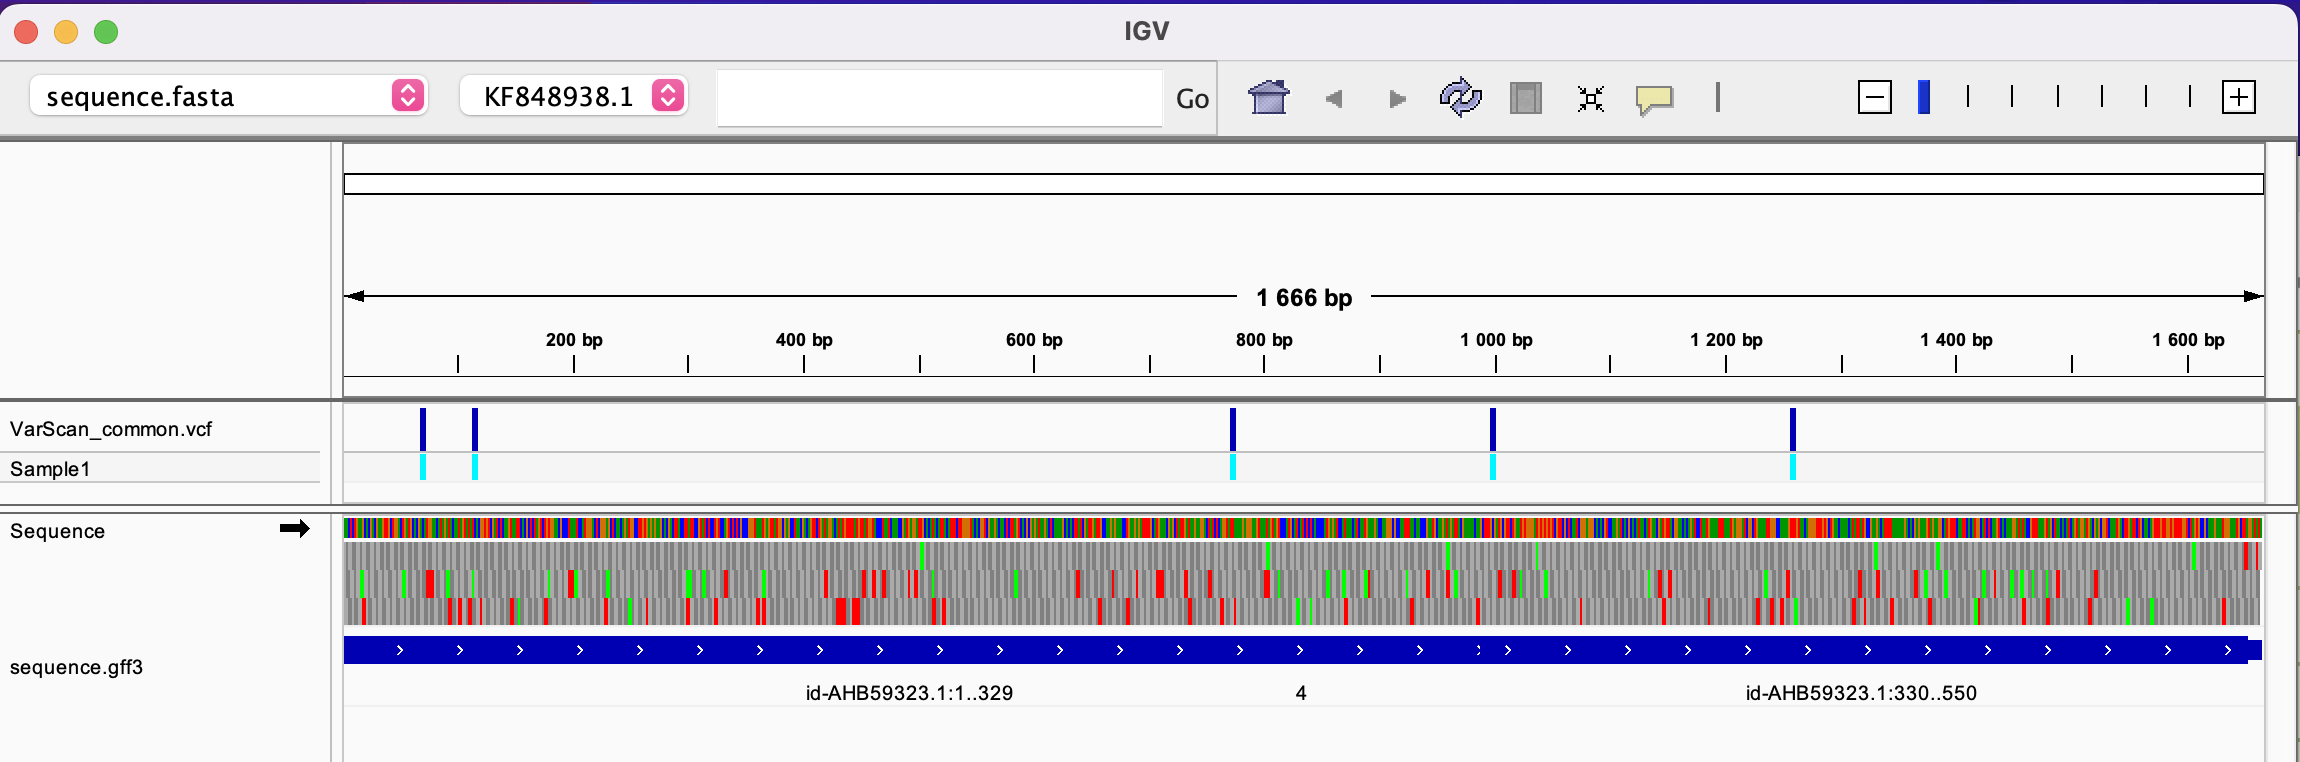

We got 5 SNPs:

1) Chr: KF848938.1
Position: 72
Reference: A*
Alternate: G
Type: SNP
SILENT

2) Chr: KF848938.1
Position: 117
Reference: C*
Alternate: T
Type: SNP
SILENT

3)Chr: KF848938.1
Position: 774
Reference: T*
Alternate: C
Type: SNP
SILENT

4)Chr: KF848938.1
Position: 999
Reference: C*
Alternate: T
Type: SNP
SILENT

5)Chr: KF848938.1
Position: 1260
Reference: A*
Alternate: C
Type: SNP
SILENT

So all mutations are silent that means no changes in protein

## Rare variants

In [ ]:
!java -jar /content/VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_rare.vcf

Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Reading input from my.mpileup
1665 bases in pileup file
20 variant positions (18 SNP, 2 indel)
0 were failed by the strand-filter
18 variant positions reported (18 SNP, 0 indel)


Let us take a look at received SNPs' FREQ


In [ ]:
!cat "VarScan_rare.vcf" | grep -v '^#' | awk '{FS="\t";OFS="\t"} {print $10}'

1/1:255:16832:16794:6:16787:99.96%:0E0:35:36:4:2:10898:5889
1/1:255:20768:20663:36:20625:99.82%:0E0:35:37:27:9:13462:7163
0/1:25:31444:31311:31248:58:0.19%:2.7559E-3:36:36:21205:10043:36:22
0/1:255:29088:28985:28700:280:0.97%:5.4371E-54:36:35:17875:10825:148:132
0/1:21:29906:29758:29702:52:0.17%:6.9675E-3:37:35:18978:10724:34:18
0/1:37:27391:27231:27167:61:0.22%:1.8501E-4:37:36:14167:13000:41:20
0/1:41:30510:30484:30411:68:0.22%:7.715E-5:37:36:19958:10453:39:29
0/1:24:30912:30870:30805:56:0.18%:3.3182E-3:37:32:19818:10987:33:23
1/1:255:31145:31006:5:30997:99.97%:0E0:34:37:5:0:18170:12827
0/1:50:32182:32089:32008:77:0.24%:9.5375E-6:37:35:18435:13573:28:49
0/1:32:31553:31455:31384:63:0.2%:6.2548E-4:35:34:17111:14273:36:27
1/1:255:29708:29277:36:29236:99.86%:0E0:35:35:21:15:16126:13110
0/1:26:28946:28903:28845:55:0.19%:2.0066E-3:35:33:16344:12501:18:37
0/1:31:23993:23992:23939:51:0.21%:7.5186E-4:36:35:12540:11399:21:30
0/1:34:25177:25093:25035:56:0.22%:3.7244E-4:37:36:8964:16071:24:32
1/1

# Control samples

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/008/SRR1705858/SRR1705858.fastq.gz

--2022-11-11 15:32:58--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/008/SRR1705858/SRR1705858.fastq.gz
           => ‘SRR1705858.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR170/008/SRR1705858 ... done.
==> SIZE SRR1705858.fastq.gz ... 14782243
==> PASV ... done.    ==> RETR SRR1705858.fastq.gz ... done.
Length: 14782243 (14M) (unauthoritative)

SRR1705858.fastq.gz 100%[===================>]  14.10M  8.50MB/s    in 1.7s    

2022-11-11 15:33:02 (8.50 MB/s) - ‘SRR1705858.fastq.gz’ saved [14782243]



In [ ]:
!gunzip "/content/SRR1705858.fastq.gz"

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/009/SRR1705859/SRR1705859.fastq.gz

--2022-11-11 15:34:00--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/009/SRR1705859/SRR1705859.fastq.gz
           => ‘SRR1705859.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR170/009/SRR1705859 ... done.
==> SIZE SRR1705859.fastq.gz ... 13581641
==> PASV ... done.    ==> RETR SRR1705859.fastq.gz ... done.
Length: 13581641 (13M) (unauthoritative)

SRR1705859.fastq.gz 100%[===================>]  12.95M  1.21MB/s    in 18s     

2022-11-11 15:34:19 (755 KB/s) - ‘SRR1705859.fastq.gz’ saved [13581641]



In [ ]:
!gunzip "/content/SRR1705859.fastq.gz"

In [ ]:
!wget ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/000/SRR1705860/SRR1705860.fastq.gz

--2022-11-11 15:34:20--  ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR170/000/SRR1705860/SRR1705860.fastq.gz
           => ‘SRR1705860.fastq.gz’
Resolving ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)... 193.62.193.138
Connecting to ftp.sra.ebi.ac.uk (ftp.sra.ebi.ac.uk)|193.62.193.138|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/fastq/SRR170/000/SRR1705860 ... done.
==> SIZE SRR1705860.fastq.gz ... 14372113
==> PASV ... done.    ==> RETR SRR1705860.fastq.gz ... done.
Length: 14372113 (14M) (unauthoritative)

SRR1705860.fastq.gz 100%[===================>]  13.71M  8.04MB/s    in 1.7s    

2022-11-11 15:34:24 (8.04 MB/s) - ‘SRR1705860.fastq.gz’ saved [14372113]



In [ ]:
!gunzip "/content/SRR1705860.fastq.gz"

## FastQC + Trimmomatic

In [ ]:
!fastqc -o . /content/SRR1705858.fastq

Started analysis of SRR1705858.fastq
Approx 5% complete for SRR1705858.fastq
Approx 10% complete for SRR1705858.fastq
Approx 15% complete for SRR1705858.fastq
Approx 20% complete for SRR1705858.fastq
Approx 25% complete for SRR1705858.fastq
Approx 30% complete for SRR1705858.fastq
Approx 35% complete for SRR1705858.fastq
Approx 40% complete for SRR1705858.fastq
Approx 45% complete for SRR1705858.fastq
Approx 50% complete for SRR1705858.fastq
Approx 55% complete for SRR1705858.fastq
Approx 60% complete for SRR1705858.fastq
Approx 65% complete for SRR1705858.fastq
Approx 70% complete for SRR1705858.fastq
Approx 75% complete for SRR1705858.fastq
Approx 80% complete for SRR1705858.fastq
Approx 85% complete for SRR1705858.fastq
Approx 90% complete for SRR1705858.fastq
Approx 95% complete for SRR1705858.fastq
Analysis complete for SRR1705858.fastq


In [ ]:
!fastqc -o . /content/SRR1705859.fastq

Started analysis of SRR1705859.fastq
Approx 5% complete for SRR1705859.fastq
Approx 10% complete for SRR1705859.fastq
Approx 15% complete for SRR1705859.fastq
Approx 20% complete for SRR1705859.fastq
Approx 25% complete for SRR1705859.fastq
Approx 30% complete for SRR1705859.fastq
Approx 35% complete for SRR1705859.fastq
Approx 40% complete for SRR1705859.fastq
Approx 45% complete for SRR1705859.fastq
Approx 50% complete for SRR1705859.fastq
Approx 55% complete for SRR1705859.fastq
Approx 60% complete for SRR1705859.fastq
Approx 65% complete for SRR1705859.fastq
Approx 70% complete for SRR1705859.fastq
Approx 75% complete for SRR1705859.fastq
Approx 80% complete for SRR1705859.fastq
Approx 85% complete for SRR1705859.fastq
Approx 90% complete for SRR1705859.fastq
Approx 95% complete for SRR1705859.fastq
Analysis complete for SRR1705859.fastq


In [ ]:
!fastqc -o . /content/SRR1705860.fastq

Started analysis of SRR1705860.fastq
Approx 5% complete for SRR1705860.fastq
Approx 10% complete for SRR1705860.fastq
Approx 15% complete for SRR1705860.fastq
Approx 20% complete for SRR1705860.fastq
Approx 25% complete for SRR1705860.fastq
Approx 30% complete for SRR1705860.fastq
Approx 35% complete for SRR1705860.fastq
Approx 40% complete for SRR1705860.fastq
Approx 45% complete for SRR1705860.fastq
Approx 50% complete for SRR1705860.fastq
Approx 55% complete for SRR1705860.fastq
Approx 60% complete for SRR1705860.fastq
Approx 65% complete for SRR1705860.fastq
Approx 70% complete for SRR1705860.fastq
Approx 75% complete for SRR1705860.fastq
Approx 80% complete for SRR1705860.fastq
Approx 85% complete for SRR1705860.fastq
Approx 90% complete for SRR1705860.fastq
Approx 95% complete for SRR1705860.fastq
Analysis complete for SRR1705860.fastq


Inspecting .fastqc files for control files shows, that the quality of samples is similar to our roommate's flu sequence, including GC content, per base sequence quality and so on. So we can analyse FP mutations in control samples and then apply the results to adjust our target investigation.

In [ ]:
!java -jar /content/Trimmomatic-0.39/trimmomatic-0.39.jar SE -phred33 /content/SRR1705858.fastq SRR1705858_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticSE: Started with arguments:
 -phred33 /content/SRR1705858.fastq SRR1705858_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Automatically using 2 threads
Input Reads: 256586 Surviving: 255645 (99.63%) Dropped: 941 (0.37%)
TrimmomaticSE: Completed successfully


In [ ]:
!java -jar /content/Trimmomatic-0.39/trimmomatic-0.39.jar SE -phred33 /content/SRR1705859.fastq SRR1705859_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticSE: Started with arguments:
 -phred33 /content/SRR1705859.fastq SRR1705859_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Automatically using 2 threads
Input Reads: 233327 Surviving: 232454 (99.63%) Dropped: 873 (0.37%)
TrimmomaticSE: Completed successfully


In [ ]:
!java -jar /content/Trimmomatic-0.39/trimmomatic-0.39.jar SE -phred33 /content/SRR1705860.fastq SRR1705860_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20

TrimmomaticSE: Started with arguments:
 -phred33 /content/SRR1705860.fastq SRR1705860_trimmed.fastq LEADING:20 TRAILING:20 SLIDINGWINDOW:10:20 MINLEN:20
Automatically using 2 threads
Input Reads: 249964 Surviving: 249104 (99.66%) Dropped: 860 (0.34%)
TrimmomaticSE: Completed successfully


In [ ]:
!fastqc -o . /content/SRR1705858_trimmed.fastq

Started analysis of SRR1705858_trimmed.fastq
Approx 5% complete for SRR1705858_trimmed.fastq
Approx 10% complete for SRR1705858_trimmed.fastq
Approx 15% complete for SRR1705858_trimmed.fastq
Approx 20% complete for SRR1705858_trimmed.fastq
Approx 25% complete for SRR1705858_trimmed.fastq
Approx 30% complete for SRR1705858_trimmed.fastq
Approx 35% complete for SRR1705858_trimmed.fastq
Approx 40% complete for SRR1705858_trimmed.fastq
Approx 45% complete for SRR1705858_trimmed.fastq
Approx 50% complete for SRR1705858_trimmed.fastq
Approx 55% complete for SRR1705858_trimmed.fastq
Approx 60% complete for SRR1705858_trimmed.fastq
Approx 65% complete for SRR1705858_trimmed.fastq
Approx 70% complete for SRR1705858_trimmed.fastq
Approx 75% complete for SRR1705858_trimmed.fastq
Approx 80% complete for SRR1705858_trimmed.fastq
Approx 85% complete for SRR1705858_trimmed.fastq
Approx 90% complete for SRR1705858_trimmed.fastq
Approx 95% complete for SRR1705858_trimmed.fastq
Analysis complete for SRR

In [ ]:
!fastqc -o . /content/SRR1705859_trimmed.fastq

Started analysis of SRR1705859_trimmed.fastq
Approx 5% complete for SRR1705859_trimmed.fastq
Approx 10% complete for SRR1705859_trimmed.fastq
Approx 15% complete for SRR1705859_trimmed.fastq
Approx 20% complete for SRR1705859_trimmed.fastq
Approx 25% complete for SRR1705859_trimmed.fastq
Approx 30% complete for SRR1705859_trimmed.fastq
Approx 35% complete for SRR1705859_trimmed.fastq
Approx 40% complete for SRR1705859_trimmed.fastq
Approx 45% complete for SRR1705859_trimmed.fastq
Approx 50% complete for SRR1705859_trimmed.fastq
Approx 55% complete for SRR1705859_trimmed.fastq
Approx 60% complete for SRR1705859_trimmed.fastq
Approx 65% complete for SRR1705859_trimmed.fastq
Approx 70% complete for SRR1705859_trimmed.fastq
Approx 75% complete for SRR1705859_trimmed.fastq
Approx 80% complete for SRR1705859_trimmed.fastq
Approx 85% complete for SRR1705859_trimmed.fastq
Approx 90% complete for SRR1705859_trimmed.fastq
Approx 95% complete for SRR1705859_trimmed.fastq
Analysis complete for SRR

In [ ]:
!fastqc -o . /content/SRR1705860_trimmed.fastq

Started analysis of SRR1705860_trimmed.fastq
Approx 5% complete for SRR1705860_trimmed.fastq
Approx 10% complete for SRR1705860_trimmed.fastq
Approx 15% complete for SRR1705860_trimmed.fastq
Approx 20% complete for SRR1705860_trimmed.fastq
Approx 25% complete for SRR1705860_trimmed.fastq
Approx 30% complete for SRR1705860_trimmed.fastq
Approx 35% complete for SRR1705860_trimmed.fastq
Approx 40% complete for SRR1705860_trimmed.fastq
Approx 45% complete for SRR1705860_trimmed.fastq
Approx 50% complete for SRR1705860_trimmed.fastq
Approx 55% complete for SRR1705860_trimmed.fastq
Approx 60% complete for SRR1705860_trimmed.fastq
Approx 65% complete for SRR1705860_trimmed.fastq
Approx 70% complete for SRR1705860_trimmed.fastq
Approx 75% complete for SRR1705860_trimmed.fastq
Approx 80% complete for SRR1705860_trimmed.fastq
Approx 85% complete for SRR1705860_trimmed.fastq
Approx 90% complete for SRR1705860_trimmed.fastq
Approx 95% complete for SRR1705860_trimmed.fastq
Analysis complete for SRR

The quality became better :)))

## Alignment

In [ ]:
!bwa mem /content/sequence.fasta /content/SRR1705858.fastq > alignment_SRR1705858.sam
!samtools view -S -b alignment_SRR1705858.sam > alignment_SRR1705858.bam
!samtools flagstat alignment_SRR1705858.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67448 sequences (10000210 bp)...
[M::process] read 67230 sequences (10000094 bp)...
[M::mem_process_seqs] Processed 67448 reads in 1.779 CPU sec, 1.729 real sec
[M::process] read 67100 sequences (10000113 bp)...
[M::mem_process_seqs] Processed 67230 reads in 2.027 CPU sec, 2.043 real sec
[M::process] read 54808 sequences (8118313 bp)...
[M::mem_process_seqs] Processed 67100 reads in 2.000 CPU sec, 2.221 real sec
[M::mem_process_seqs] Processed 54808 reads in 1.629 CPU sec, 1.565 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem /content/sequence.fasta /content/SRR1705858.fastq
[main] Real time: 7.952 sec; CPU: 7.580 sec
256744 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
158 + 0 supplementary
0 + 0 duplicates
256658 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 w

In [ ]:
!samtools sort alignment_SRR1705858.bam -o alignment_sorted_SRR1705858.bam
!samtools index /content/alignment_sorted_SRR1705858.bam

In [ ]:
!bwa mem /content/sequence.fasta /content/SRR1705859.fastq > alignment_SRR1705859.sam
!samtools view -S -b alignment_SRR1705859.sam > alignment_SRR1705859.bam
!samtools flagstat alignment_SRR1705859.bam
!samtools sort alignment_SRR1705859.bam -o alignment_sorted_SRR1705859.bam
!samtools index /content/alignment_sorted_SRR1705859.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67476 sequences (10000274 bp)...
[M::process] read 67236 sequences (10000039 bp)...
[M::mem_process_seqs] Processed 67476 reads in 1.690 CPU sec, 1.625 real sec
[M::process] read 67216 sequences (10000283 bp)...
[M::mem_process_seqs] Processed 67236 reads in 1.928 CPU sec, 1.766 real sec
[M::process] read 31399 sequences (4635971 bp)...
[M::mem_process_seqs] Processed 67216 reads in 1.826 CPU sec, 1.724 real sec
[M::mem_process_seqs] Processed 31399 reads in 1.031 CPU sec, 0.943 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem /content/sequence.fasta /content/SRR1705859.fastq
[main] Real time: 6.510 sec; CPU: 6.578 sec
233451 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
124 + 0 supplementary
0 + 0 duplicates
233375 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 w

In [ ]:
!bwa mem /content/sequence.fasta /content/SRR1705860.fastq > alignment_SRR1705860.sam
!samtools view -S -b alignment_SRR1705860.sam > alignment_SRR1705860.bam
!samtools flagstat alignment_SRR1705860.bam
!samtools sort alignment_SRR1705860.bam -o alignment_sorted_SRR1705860.bam
!samtools index /content/alignment_sorted_SRR1705860.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 67356 sequences (10000126 bp)...
[M::process] read 67208 sequences (10000122 bp)...
[M::mem_process_seqs] Processed 67356 reads in 1.693 CPU sec, 1.632 real sec
[M::process] read 67010 sequences (10000072 bp)...
[M::mem_process_seqs] Processed 67208 reads in 1.949 CPU sec, 1.788 real sec
[M::process] read 48390 sequences (7170166 bp)...
[M::mem_process_seqs] Processed 67010 reads in 1.880 CPU sec, 1.740 real sec
[M::mem_process_seqs] Processed 48390 reads in 1.418 CPU sec, 1.375 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem /content/sequence.fasta /content/SRR1705860.fastq
[main] Real time: 7.018 sec; CPU: 7.055 sec
250184 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
220 + 0 supplementary
0 + 0 duplicates
250108 + 0 mapped (99.97% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 w

## VarScan

Examine maximum quantity of aligned reads. It equals to 256658 in SRR1705858 sample, so we estimated depth using it.

In [ ]:
256658 * 150/1665

23122.34234234234

Set -d option as 25000

Let's build one-line command with pipes

In [ ]:
!samtools mpileup -d 25000 -f /content/sequence.fasta /content/alignment_sorted_SRR1705858.bam | java -jar /content/VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_SRR1705858_rare.vcf

[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Input stream not ready, waiting for 5 seconds...
Reading input from STDIN
1665 bases in pileup file
56 variant positions (56 SNP, 0 indel)
1 were failed by the strand-filter
55 variant positions reported (55 SNP, 0 indel)


In [ ]:
!samtools mpileup -d 25000 -f /content/sequence.fasta /content/alignment_sorted_SRR1705859.bam | java -jar /content/VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_SRR1705859_rare.vcf

[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Input stream not ready, waiting for 5 seconds...
Reading input from STDIN
1665 bases in pileup file
54 variant positions (54 SNP, 0 indel)
2 were failed by the strand-filter
52 variant positions reported (52 SNP, 0 indel)


In [ ]:
!samtools mpileup -d 25000 -f /content/sequence.fasta /content/alignment_sorted_SRR1705860.bam | java -jar /content/VarScan.v2.3.9.jar  mpileup2snp my.mpileup --min-var-freq 0.001 --variants --output-vcf 1 > VarScan_SRR1705860_rare.vcf

[mpileup] 1 samples in 1 input files
Only SNPs will be reported
Min coverage:	8
Min reads2:	2
Min var freq:	0.001
Min avg qual:	15
P-value thresh:	0.01
Input stream not ready, waiting for 5 seconds...
Reading input from STDIN
1665 bases in pileup file
61 variant positions (61 SNP, 0 indel)
0 were failed by the strand-filter
61 variant positions reported (61 SNP, 0 indel)


In [ ]:
import pandas as pd

In [ ]:
table_SRR1705858 = pd.read_table("VarScan_SRR1705858_rare.vcf", sep = '\t', comment='#', header = None)
table_SRR1705858 = pd.concat([table_SRR1705858[[1, 3, 4]], table_SRR1705858[9].apply(lambda x: float(x.split(':')[6][:-1])/100)], axis=1)
table_SRR1705858.columns = ['POS', 'REF', 'ALT', 'freq']


In [ ]:
table_SRR1705859 = pd.read_table("VarScan_SRR1705859_rare.vcf", sep = '\t', comment='#', header = None)
table_SRR1705859 = pd.concat([table_SRR1705859[[1, 3, 4]], table_SRR1705859[9].apply(lambda x: float(x.split(':')[6][:-1])/100)], axis=1)
table_SRR1705859.columns = ['POS', 'REF', 'ALT', 'freq']


In [ ]:
table_SRR1705860 = pd.read_table("VarScan_SRR1705860_rare.vcf", sep = '\t', comment='#', header = None)
table_SRR1705860 = pd.concat([table_SRR1705860[[1, 3, 4]], table_SRR1705860[9].apply(lambda x: float(x.split(':')[6][:-1])/100)], axis=1)
table_SRR1705860.columns = ['POS', 'REF', 'ALT', 'freq']


In [ ]:
print(f'avg = {table_SRR1705858.freq.mean()}, std = {table_SRR1705858.freq.std()}')

avg = 0.002610909090909091, std = 0.0007057102351722951


In [ ]:
print(f'avg = {table_SRR1705859.freq.mean()}, std = {table_SRR1705859.freq.std()}')

avg = 0.0023884615384615385, std = 0.0005271655044480241


In [ ]:
print(f'avg = {table_SRR1705860.freq.mean()}, std = {table_SRR1705860.freq.std()}')

avg = 0.002509836065573771, std = 0.0007790389203013301


In [ ]:
mean_mean = (table_SRR1705858.freq.mean() + table_SRR1705859.freq.mean() + table_SRR1705860.freq.mean())/3
mean_avg = (table_SRR1705858.freq.std() + table_SRR1705859.freq.std() + table_SRR1705860.freq.std())/3

In [ ]:
mean_avg

0.0006706382199738831

If frequence of a mutation is higher than mu + 3*sigma = 0.7388131159887213%, then we probably can trust them. Nevertheless it is still required to check them in IGV.

We got mutations:

1)**Chr: KF848938.1
Position: 307
Reference: C*
Alternate: T
Type: SNP
Pro -> Ser**

2)Chr: KF848938.1
Position: 1458
Reference: T*
Alternate: C
Type: SNP
Silent

So we have only one SNP which changes the protein

Now we are going to look at the epitope from the article "Epitope analysis for influenza vaccine design" by Enrique T. Munoz and Michael W. Deem. Our mutation locates in the 103 residue, that matches Epitope D

# Optional Extra-Credit Challenge Question

## 1) Actual average coverage

1) How would you calculate the ACTUAL average coverage per position for one of our data sets, only for mapped reads, and taking into consideration the fact that the reads can be not all the same length? You can use a script or software that someone else wrote - in this case please explain how it works, and how you would call it at the command line. Include your approach, and your answer, if you found one, at the end of your lab report, after the discussion.





In [ ]:
!head /content/alignment_SRR1705858.sam

@SQ	SN:KF848938.1	LN:1665
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem /content/sequence.fasta /content/SRR1705858.fastq
SRR1705858.1	16	KF848938.1	1	60	57S51M	*	0	0	CTATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCAC	7D@DF@.C.?BCC7.HGBGDFFFHHHHEBA?FA?GGBGF=C-EE@F@HHEEE=EGFEAFHGE8CA,CA?BGDEA9CEHHHEC@+6>CC>@,AB?BBB<BA?<<<????	NM:i:0	MD:Z:51	AS:i:51	XS:i:0
SRR1705858.2	0	KF848938.1	1	60	56S95M	*	0	0	TATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCCTTGGGCACCATGCAGTGCCAAACGGAACAATAGTGAAAACAATCACGAATGA	AAAAABBBDEDDDDDEGGGGGGIIIIIIHIIIIIIIIIHIIIIIIIIIHHIIIHHHIHIIIIHIIIIIIIIIIIIIIIIIIIIIIHHHHHIHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGEGGGEGEGGGGGGGGGGGGGGGG	NM:i:0	MD:Z:95	AS:i:95	XS:i:0
SRR1705858.3	16	KF848938.1	1	60	57S43M	*	0	0	CTATTAACCATGAAGACTATCATTGCTTTGAGCTACATTCTATGTCTGGTTTTCGCTCAAAAACTTCCTGGAAATGACAACAGCACGGCAACGCTGTGCC	FHHHFFHHHHHHHGCFHHHIIIHHHIIIIIIIIIIHHIIFHIHFFHIHHHHHHHGFDHIIIH

In [ ]:
!cat "/content/alignment_SRR1705858.sam" | grep -v '^@' | awk '{FS="\t";OFS="\t"} {print length($10)}' > read_counts_SRR1705858.txt

In [ ]:
total_bases = pd.read_table('read_counts_SRR1705858.txt', header = None).sum()
avg_cov = total_bases/1665
print(f'Average coverage per base for sample SRR1705858 is {round(avg_cov[0])}')

Average coverage per base for sample SRR1705858 is 22899


## 2) Mistake frequences

2) Using positions reported by VarScan in all 3 of the reference sequences, can you distinguish PCR (“upstream”) and sequencing (“during”) errors? Provide average and standard deviation for both types of error. 


In [ ]:
import seaborn as sns

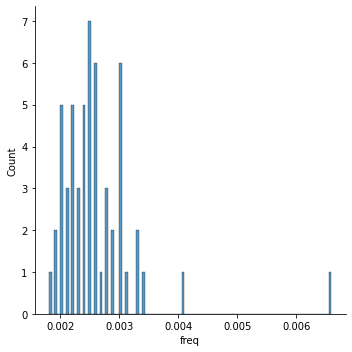

In [ ]:
sns.displot(table_SRR1705858.freq, bins = 100)

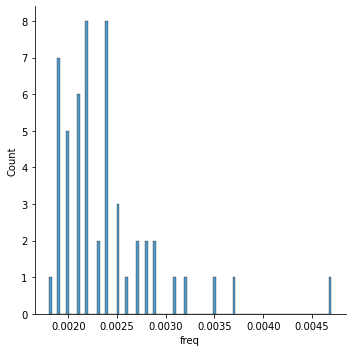

In [ ]:
sns.displot(table_SRR1705859.freq, bins = 100)

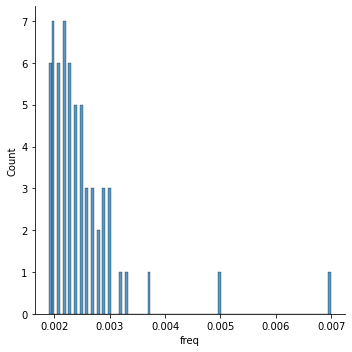

In [ ]:
sns.displot(table_SRR1705860.freq, bins = 100)

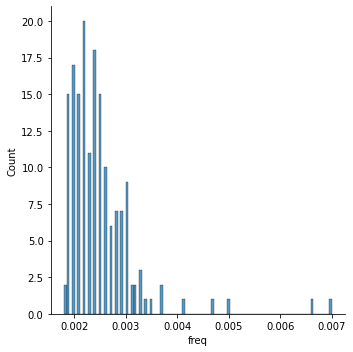

In [ ]:
sns.displot(pd.concat([table_SRR1705858.freq, table_SRR1705859.freq, table_SRR1705860.freq]), bins = 100)

We can see, that there are a lot of mistakes with about 0.2% frequency. Apart from it there is some of mistakes with higher frequency, which are PCR mistakes, because some of them occured in some moment of PCR. So they are in several reads.

In [ ]:
agg_freq_table = pd.concat([table_SRR1705858.freq, table_SRR1705859.freq, table_SRR1705860.freq])

In [ ]:
mean_PCR = agg_freq_table[agg_freq_table>0.004].mean()*100
std_PCR = agg_freq_table[agg_freq_table>0.004].std()*100
mean_seq = agg_freq_table[agg_freq_table<=0.004].mean()*100
std_seq = agg_freq_table[agg_freq_table<=0.004].std()*100

In [ ]:
print(f'Sequencing mistakes have frequence with mean {round(mean_PCR, 3)}% and deviation {round(std_PCR,3)}%. As for PCR mistakes {round(mean_seq, 3)}% and {round(std_seq,3)}% and mean and deviation')

Sequencing mistakes have frequence with mean 0.548% and deviation 0.126%. As for PCR mistakes 0.241% and 0.041% and mean and deviation


## 3) PDB structure examine

3) If you are familiar with the PDB database, you can try to explore VMD, PyMOL, Jmol, RasMol, or some other PDB-viewing application to provide an image of the H3N2 hemagglutinin molecule and highlight amino acid changes you’ve found.


Only 103 residue before mutation (P)
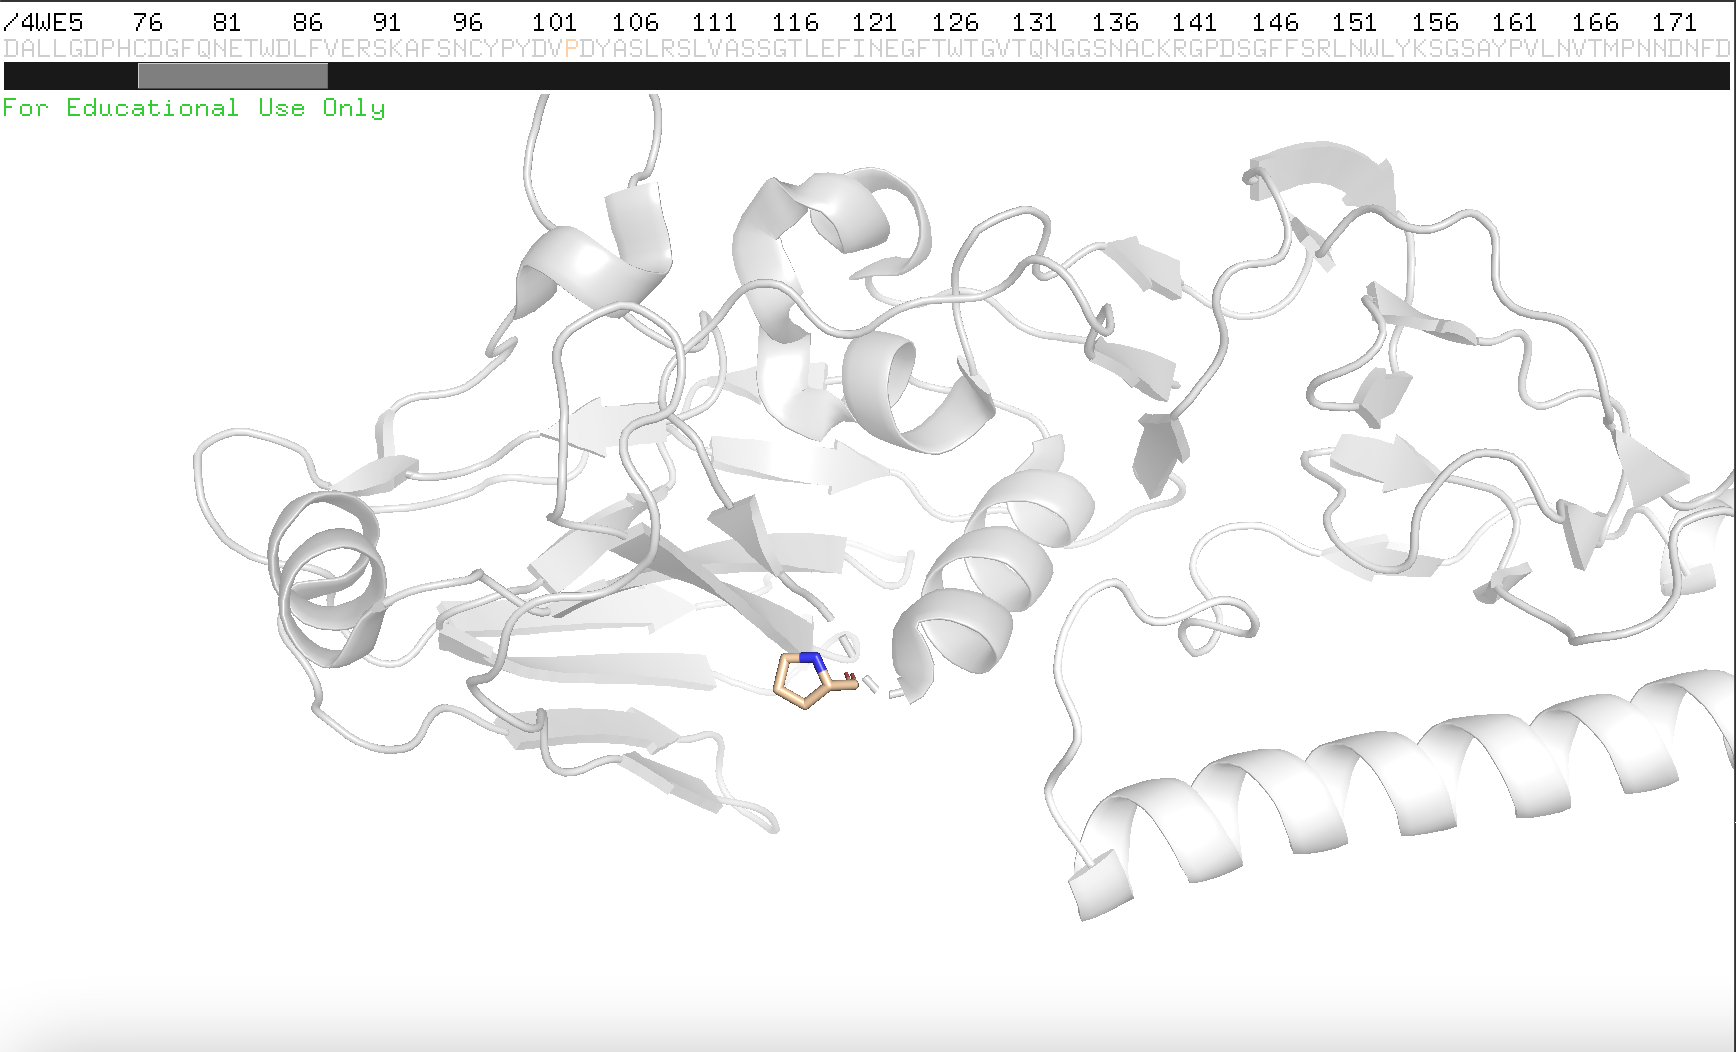

After mutation (S)
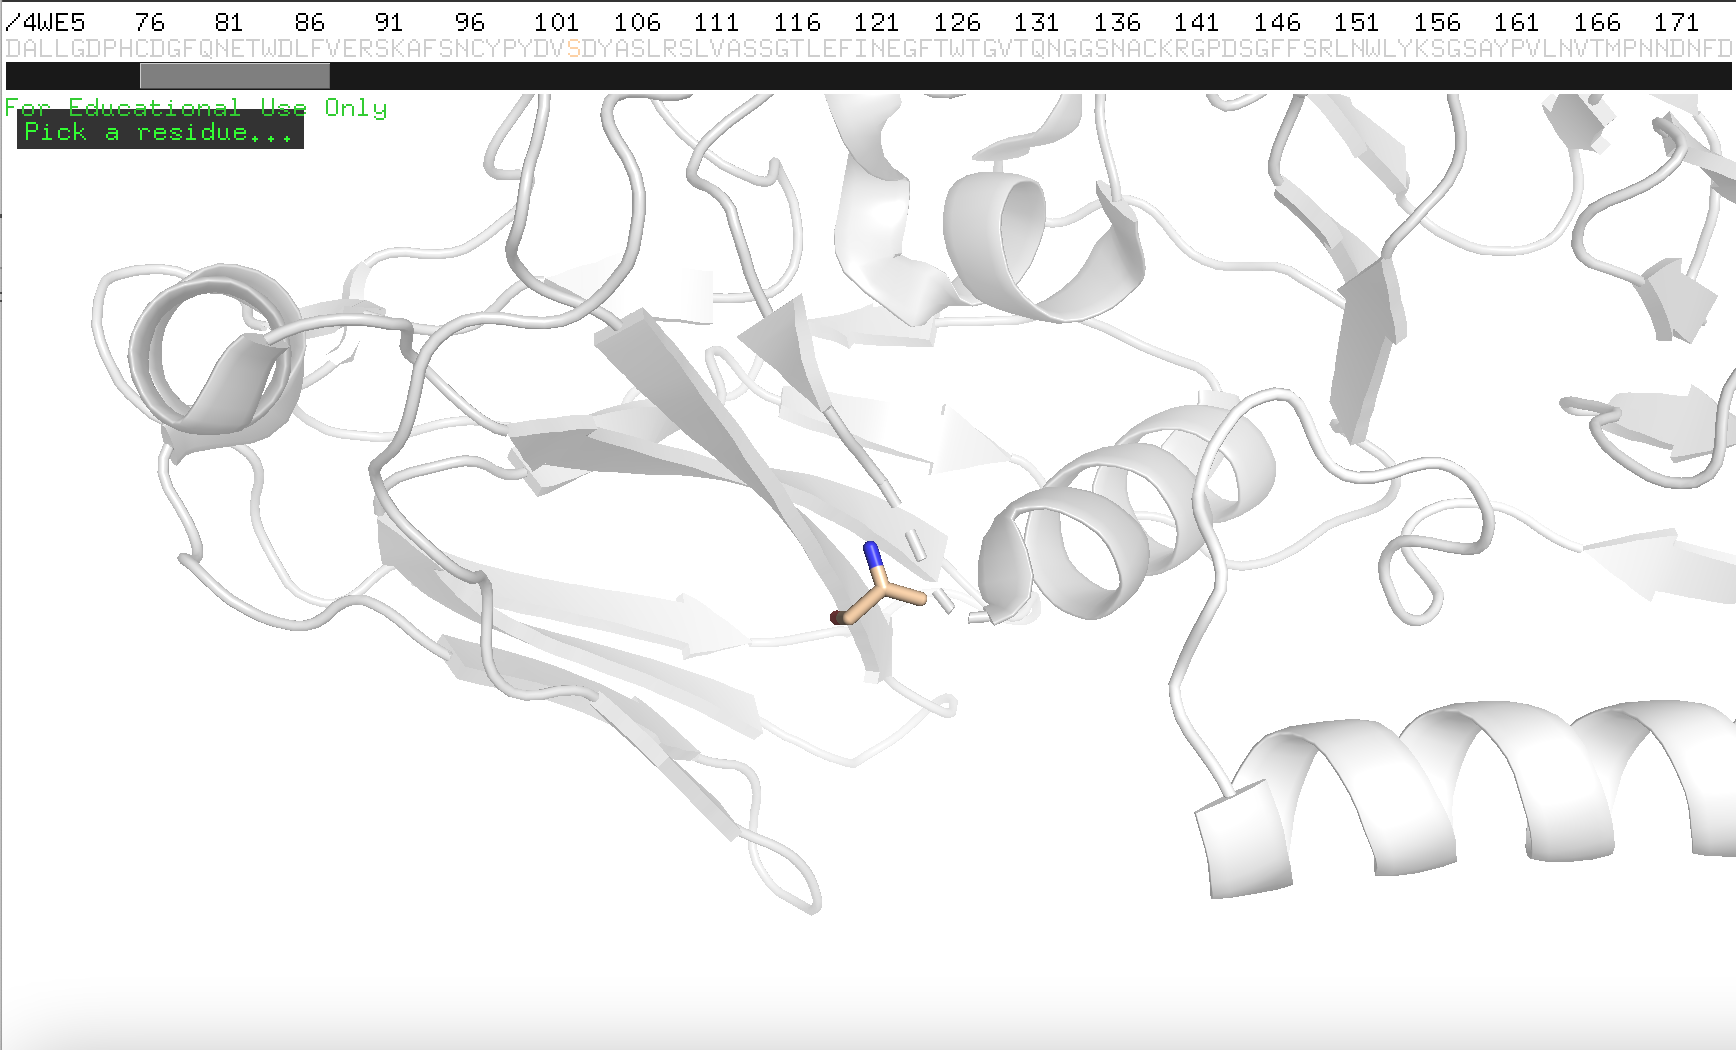